Logistic Regression aims to solve classification problems by predicting categorical outcomes. Sometimes there are two outcomes to classify (binomial), and sometimes there are more than two outcomes to classify (multinomial).

In [7]:
import numpy as np
from sklearn import linear_model

# X represents the size of a tumor in centimeters
X = np.array([3.78, 2.44, 2.09, 0.14, 1.72, 1.65, 4.92, 4.37, 4.96, 4.52, 3.69, 5.88]).reshape(-1, 1) # reshapes with all rows and one column

# X has to be reshaped into a column from a row for the LogisticRegression() function to work.

# y represents whether or not the tumor is cancerous 
y = np.array([0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1]) 

logr = linear_model.LogisticRegression()
logr.fit(X,y)

# predict if tumor is cancerous where the size is 3.46mm
predicted = logr.predict(np.array([3.46]).reshape(-1,1))
print(predicted)

[0]


In logistic regression, the coefficient is the expected change in log-odds of having the outcome per unit change in X.

In [8]:
log_odds = logr.coef_
odds = np.exp(log_odds)
print(odds)

[[4.03541657]]


This tells us that if the size of the tumor increases by 1 unit, then the odds of it being a tumor increases by 4 times. 

In [9]:
def log2prob(logr, x):
    log_odds = logr.coef_ * x + logr.intercept_
    odds = np.exp(log_odds)
    probability = odds/(1 + odds) # convert odds to probability
    return(probability)

Use the function to find the probability that each tumor is cancerous.

In [11]:
print(log2prob(logr, X))

[[0.60749955]
 [0.19268876]
 [0.12775886]
 [0.00955221]
 [0.08038616]
 [0.07345637]
 [0.88362743]
 [0.77901378]
 [0.88924409]
 [0.81293497]
 [0.57719129]
 [0.96664243]]


Confusion matrix - a table that is used in classification problems to assess where errors in the model were made. 

Rows - actual classes the outcomes should have been. 
Columns - the predictions that were made. 

True Positive - predicted positive, actual positive

True Negative - predicted negative, actual negative

False Positive - predicted positive, actual negative (Type I Error)

False Negative - predicted negative, actual positive (Type II Error)

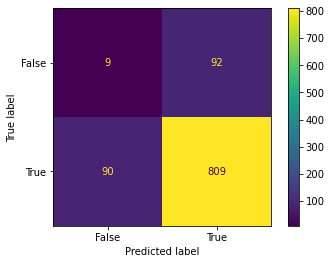

In [18]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import metrics

actual = np.random.binomial(1, 0.9, size=1000)
predicted = np.random.binomial(1, 0.9, size=1000)

confusion_matrix = metrics.confusion_matrix(actual, predicted)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix=confusion_matrix, display_labels=[False, True])
cm_display.plot()
plt.show()

Confusion Matrix Metrics:

In [22]:
# Accuracy measures how often the model is correct.
# (True Positive + True Negative) / Total Predictions
accuracy = metrics.accuracy_score(actual, predicted)

# Precision - of the positives predicted, what percentage was truly positive
# True Positive / (True Positive + False Positive)
precision = metrics.precision_score(actual, predicted)

# Sensitivity (Recall) measures how good the model is at predicting positives
# True Positive / (True Positive + False Negative)
sensitivity_recall = metrics.recall_score(actual, predicted)

# Specificity - how good is the model at predicting negatives
# True Negative / (True Negative + False Positive)
specificity = metrics.recall_score(actual, predicted, pos_label=0)

# F-score is the "harmonic mean" of precision and sensitivity
# It considers both false positive and false negative cases and is good for imbalanced datasets.
# 2 * ((precision * sensitivity) / (precision + sensitivity))
f1_score = metrics.f1_score(actual, predicted)

# metrics
print({"Accuracy":accuracy, "Precision":precision, "Sensitivity_recall":sensitivity_recall, "Specificity":specificity, "F1_score":f1_score})

{'Accuracy': 0.818, 'Precision': 0.897891231964484, 'Sensitivity_recall': 0.899888765294772, 'Specificity': 0.0891089108910891, 'F1_score': 0.8988888888888891}


AUC - ROC Curve
(Area Under Curve - Receiver Operating Characteristic)

The ROC curve is an evaluation metric for binary classification problems. It is a probability curve that plots the True Positive Rate against the False Positive Rate at various thresholds. 

The AUC is the measure of the ability of a binary classifier to distinguish between classes and is used as a summary of the ROC curve. 
"The higher the AUC, the better the model's performance at distinguishing between the positive and negative classes."

In [23]:
import numpy as np
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, roc_curve

n = 10000
ratio = 0.95
n_0 = int((1-ratio) * n)
n_1 = int(ratio * n)

y = np.array([0] * n_0 + [1] * n_1)
# below are the probabilities obtained from a hypothetical model that always predicts the majority class
# probability of predicting class 1 is going to be 100%
y_proba = np.array([1] * n)
y_pred = y_proba > 0.5

print(f'accuracy score: {accuracy_score(y, y_pred)}')
cf_mat = confusion_matrix(y, y_pred)
print('Confusion Matrix')
print(cf_mat)
print(f'Class 0 accuracy: {cf_mat[0][0]/n_0}')
print(f'Class 1 accuracy: {cf_mat[1][1]/n_1}')


accuracy score: 0.95
Confusion Matrix
[[   0  500]
 [   0 9500]]
Class 0 accuracy: 0.0
Class 1 accuracy: 1.0


In [26]:
# below are the probabilities obtained from a hypothetical model that doesn't always predict the mode
y_proba_2 = np.array(
    np.random.uniform(0, .7, n_0).tolist() + 
    np.random.uniform(.3, 1, n_1).tolist()
)
y_pred_2 = y_proba_2 > 0.5

print(f'accuracy score: {accuracy_score(y, y_pred_2)}')
cf_mat = confusion_matrix(y, y_pred_2)
print('Confusion Matrix')
print(cf_mat)
print(f'Class 0 accuracy: {cf_mat[0][0]/n_0}')
print(f'Class 1 accuracy: {cf_mat[1][1]/n_1}')

accuracy score: 0.7102
Confusion Matrix
[[ 367  133]
 [2765 6735]]
Class 0 accuracy: 0.734
Class 1 accuracy: 0.7089473684210527


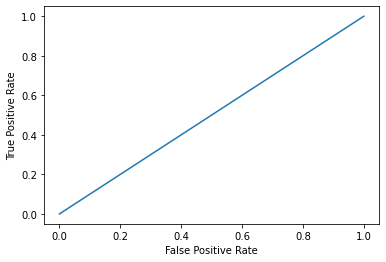

Model 1 AUC score: 0.5


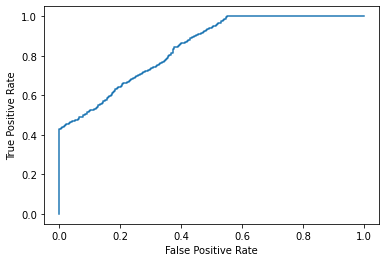

Model 2 AUC score: 0.841874947368421


In [28]:
import matplotlib.pyplot as plt

def plot_roc_curve(true_y, y_prob):
    # plots the ROC curve based off of the probabilities
    fpr, tpr, thresholds = roc_curve(true_y, y_prob)
    plt.plot(fpr, tpr)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.show()

# Model 1
plot_roc_curve(y, y_proba)
print(f'Model 1 AUC score: {roc_auc_score(y, y_proba)}')

# Model 2
plot_roc_curve(y, y_proba_2)
print(f'Model 2 AUC score: {roc_auc_score(y, y_proba_2)}')


Given two models with similar accuracies, the model with the higher AUC score will be more reliable because it takes into account the predicted probability. It will more likely give you higher accuracies when predicting future data.